In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

2023-06-07 19:47:17.297034: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Load the dataset

df = pd.read_csv('jena_climate_2009_2016.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [6]:
# Use the data for every hour instead of every 10 mins for size reduction
df_short = df[1::6] #Select every 6th datapoint
df_short.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
13,01.01.2009 02:20:00,996.74,-8.83,264.58,-9.68,93.5,3.13,2.92,0.20,1.83,2.93,1312.15,0.36,0.63,184.8
19,01.01.2009 03:20:00,996.97,-8.94,264.45,-9.82,93.3,3.10,2.89,0.21,1.81,2.90,1313.01,0.10,0.63,115.3
25,01.01.2009 04:20:00,997.11,-9.49,263.89,-10.54,92.0,2.97,2.73,0.24,1.71,2.74,1316.02,0.34,0.75,159.7


<Axes: xlabel='Date Time'>

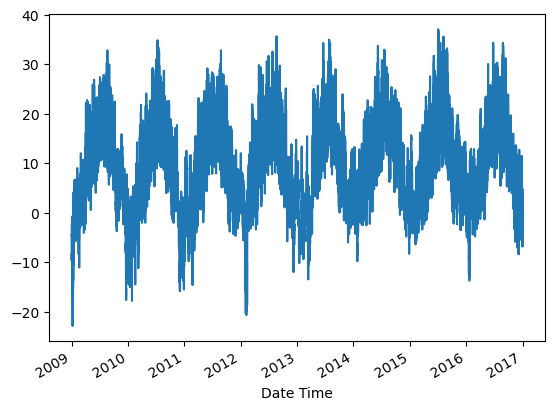

In [8]:
# Convert Time as index of the dataframe
df_short.index = pd.to_datetime(df_short['Date Time'], format='%d.%m.%Y %H:%M:%S')
# Plot to visualize the variables. alternatively create a widget to interact
df_short['T (degC)'].plot()

In [38]:
# Function to create sliding windows for creating a supervised learning method

def df_to_window(df, window_size=5):
    df_as_np = df.to_numpy()
    X = np.lib.stride_tricks.sliding_window_view(df_as_np, window_shape=(window_size, df_as_np.shape[1]))
    y = df_as_np[window_size:]
    return X, y

In [39]:
X,y = df_to_window(df_short, window_size = 5)
X.shape, y.shape

((70088, 1, 5, 15), (70087, 15))